# MIS780 Advanced AI For Business - Assignment 2 - T2 2024

## Task Number 1: Real estate analytics with tabular data

**Student Name:** Sachin Bhat

**Student ID:** 218676233

## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)

5. [References](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

Predicting house prices accurately is essential for real estate professionals to make smart, informed decisions in a competitive market. Correct pricing helps avoid overvaluation, which can keep properties on the market too long, and undervaluation, which can lead to financial losses. This project focuses on using machine learning models to predict house prices based on historical data, allowing professionals to make data-driven decisions and maintain a competitive edge.

The dataset contains detailed information on over **21,000 housing transactions**, including features like **square footage**, **number of bedrooms and bathrooms**, **year built**, **condition**, **zipcode**, and **waterfront views**. These features provide a full picture of the factors that influence house prices, making the data highly suitable for machine learning models to accurately capture pricing trends.

Two models were tested: **Linear Regression** as a simple baseline, and the more advanced **Multi-Layer Perceptron (MLP)**. While linear regression offers basic insights, the complexity of real estate data required the MLP model to capture non-linear relationships between features and prices. The MLP’s multiple hidden layers allow it to model deeper interactions, making it more effective for this task.

Several experiments were conducted to fine-tune the MLP model by adjusting its architecture and hyperparameters. These experiments explored different numbers of hidden layers and hidden nodes. Metrics such as **Mean Absolute Error (MAE)**, **Root Mean Squared Error (RMSE)**, and **R²** were used to evaluate performance. The best configuration featured **three hidden layers (100, 180, and 20 nodes)** with early stopping to prevent overfitting.

The best model (**MLP 2**) achieved an **MAE of 53,327.65**, an **RMSE of 75,185.61**, and an **R² of 0.846**, significantly outperforming the linear regression baseline, which had an **MAE of 83,442.18** and an **R² of 0.670**. The MLP’s ability to capture complex, non-linear relationships makes it ideal for real-world application in the real estate industry. A strong correlation between true and predicted prices (**0.924**) further supports the model’s accuracy for predicting house prices.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MIS780 Advanced AI/Assignment 2/Part1_house_price.csv',engine='python')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [ ]:
print('Sample size:', df.shape[0]) # Getting sample size of the data
print('Number of columns:', df.shape[1]) # Getting number of columns in the data
df.info() # Getting details such as non-null, count and datatype for all columns

Sample size: 20000
Number of columns: 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   price          20000 non-null  float64
 3   bedrooms       20000 non-null  int64  
 4   bathrooms      20000 non-null  float64
 5   sqft_living    20000 non-null  int64  
 6   sqft_lot       20000 non-null  int64  
 7   floors         20000 non-null  float64
 8   waterfront     20000 non-null  int64  
 9   view           20000 non-null  int64  
 10  condition      20000 non-null  int64  
 11  grade          20000 non-null  int64  
 12  sqft_above     20000 non-null  int64  
 13  sqft_basement  20000 non-null  int64  
 14  yr_built       20000 non-null  int64  
 15  yr_renovated   20000 non-null  int64  
 16  zipcode        20000 non-null  int64  
 17  lat      

In [ ]:
# Identifying and count entries with "missing" values under each column
missing_counts = df.apply(lambda x: (x == 'missing').sum())

# Printing the counts
print("Count of 'missing' values under each column:")
print(missing_counts)

Count of 'missing' values under each column:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
# Converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# Extracting year and month from the 'date' column
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month

**Feature engineering** was used to gain new insights from the existing data and enhance the model’s performance. Three new features were created:

1. House Age: This feature calculates how old the house is by subtracting the year it was built (yr_built) from the year it was sold (year_sold). This helps assess the impact of the house's age on its price.

2. Years Since Renovation: This measures the time that has passed since the house was last renovated, providing insight into how recent renovations may affect its value.

3. Bed-to-Bath Ratio: This feature calculates the ratio of bedrooms to bathrooms. A higher ratio might suggest overcrowding, while a lower ratio could imply more spacious living, which could be seen as a premium feature.

In [ ]:
# Feature Engineering. Creating new features based on existing ones
df['house_age'] = df['year_sold'] - df['yr_built']
df['years_since_renovation'] = df['year_sold'] - df['yr_renovated']
df['bed_bath_ratio'] = df['bedrooms'] / df['bathrooms']

# Handling infinite or undefined values in new features
df.replace([float('inf'), -float('inf')], 0, inplace=True)
df.fillna(0, inplace=True)  # In case any NaN values are introduced

In [ ]:
# Removing outliers in the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# Additionally handling outliers for key features
for column in ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

As algorithms like the MLP are sensitive to the magnitude of input data, we applied MinMaxScaler. It adjusts the features to fall within a range of 0 to 1, which helps improve model performance by making sure all features are on the same scale, allowing the model to process them more effectively.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [ ]:
# Dropping unrequired features
df = df.drop(columns=['id', 'date'])

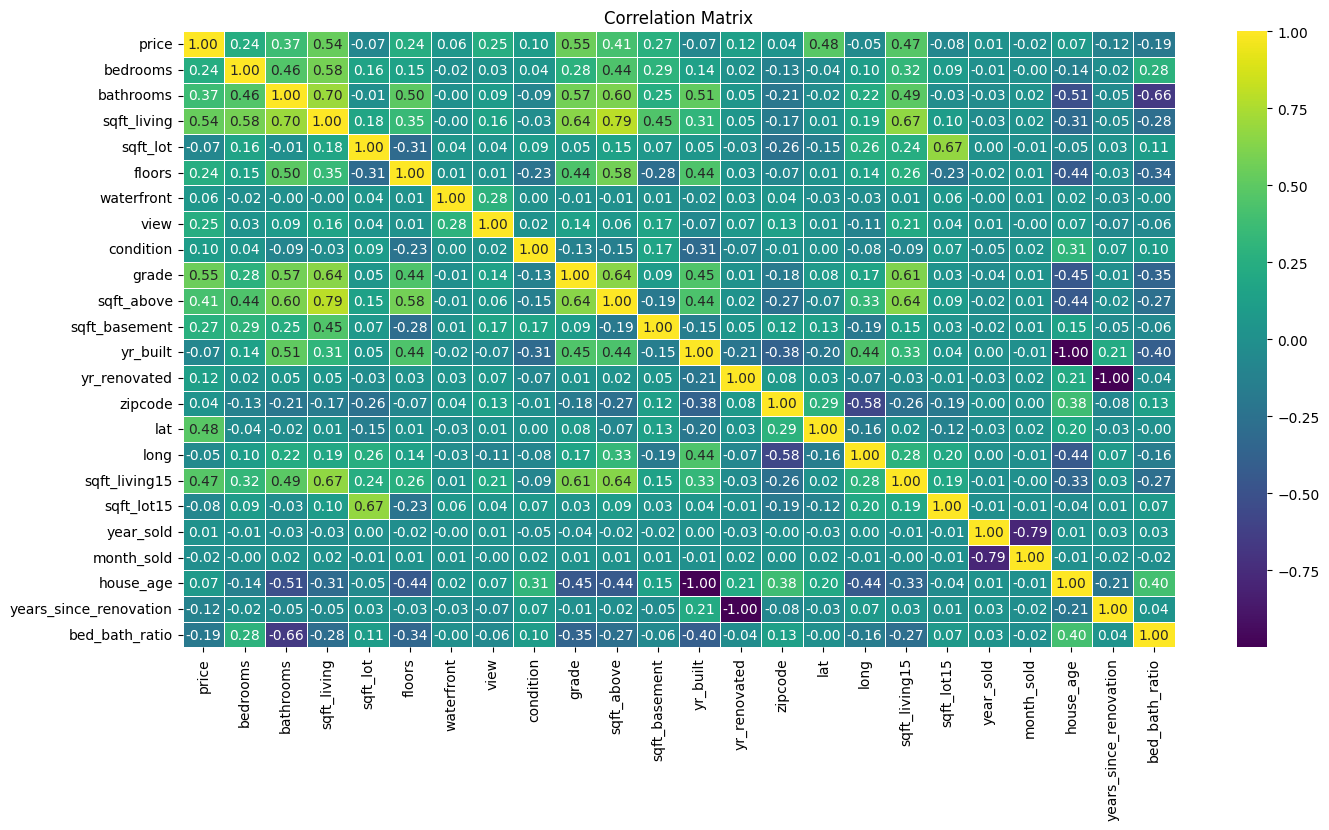

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The **correlation matrix** reveals a strong positive relationship between **sqft_living** and **price**, meaning larger living spaces are generally linked to higher prices. Features like **sqft_basement** and **view** also show a moderate positive correlation with price. Recognizing these connections is valuable for selecting key features and improving the model’s performance.

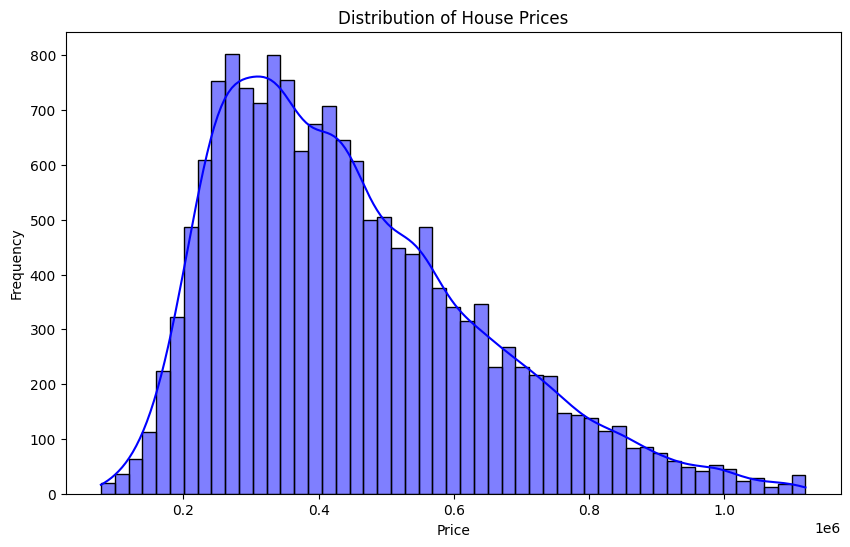

In [ ]:
# House Prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The **histogram** reveals that the majority of homes are priced between 200,000 and 600,000, with a smaller number of higher-priced homes creating a long tail. This distribution gives a clear picture of how prices are spread throughout the dataset and offers insights into typical real estate pricing trends.

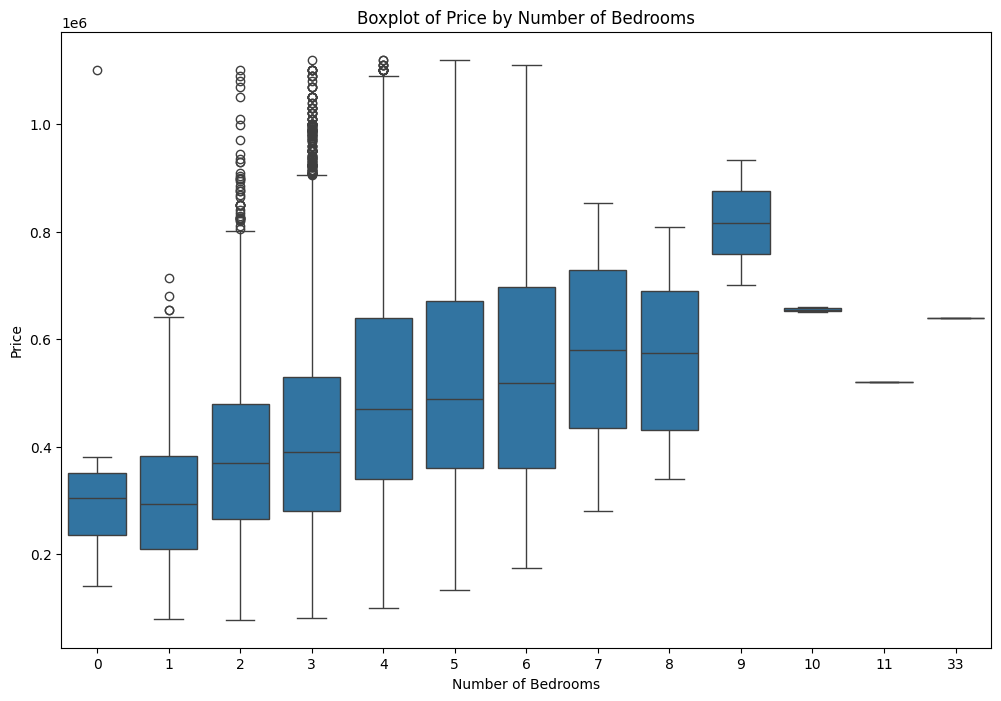

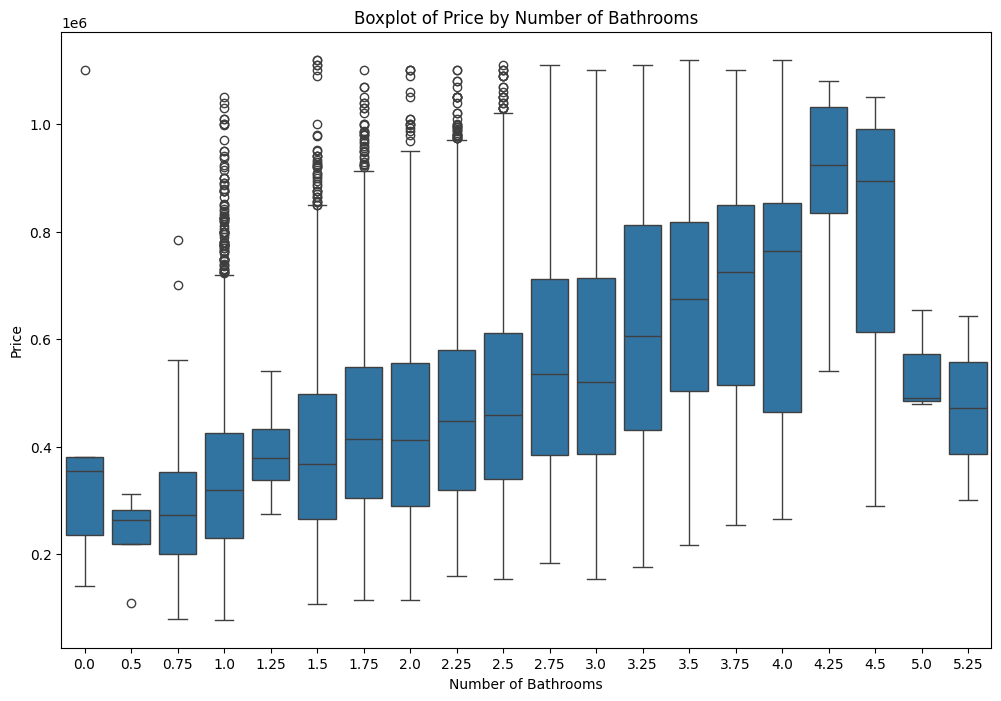

In [ ]:
# Boxplots of Price with Number of Bedrooms and Number of Bathrooms.
plt.figure(figsize=(12, 8))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Boxplot of Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='bathrooms', y='price', data=df)
plt.title('Boxplot of Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')
plt.show()

**Boxplots of Price by Number of Bedrooms and Bathrooms**: The boxplots indicate that, in general, prices tend to rise as the number of bedrooms and bathrooms increases. However, the variation in price becomes larger with more rooms, likely due to other factors like location and condition, which were examined further during the modeling process.

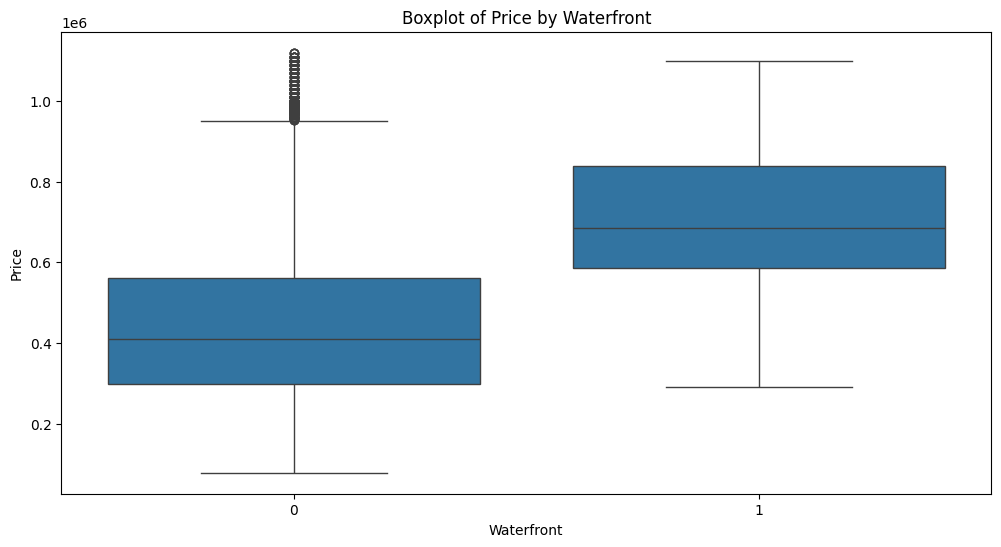

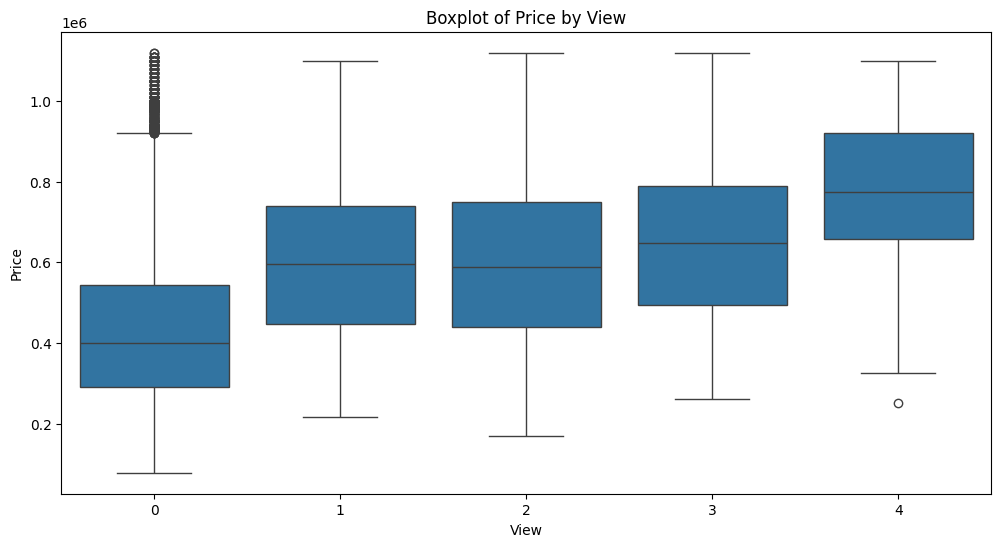

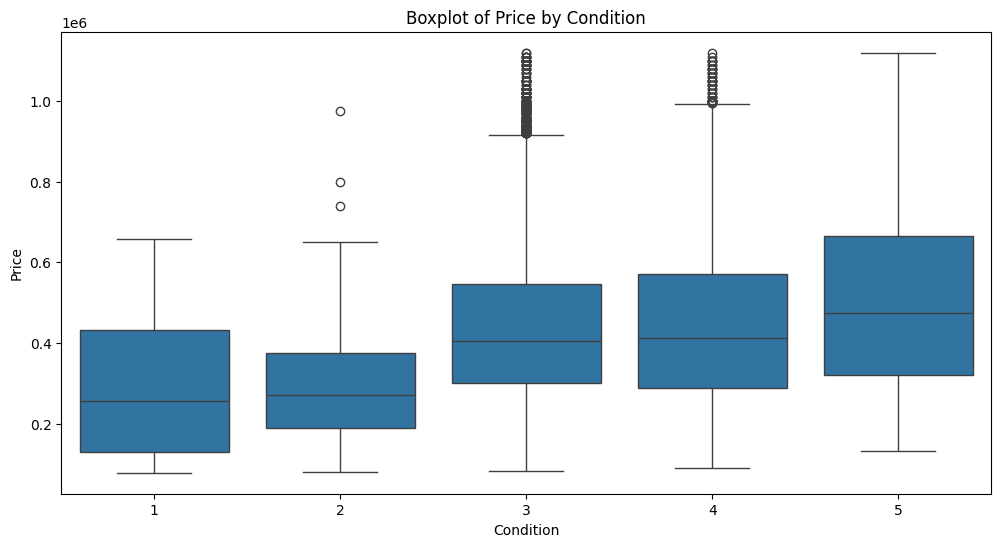

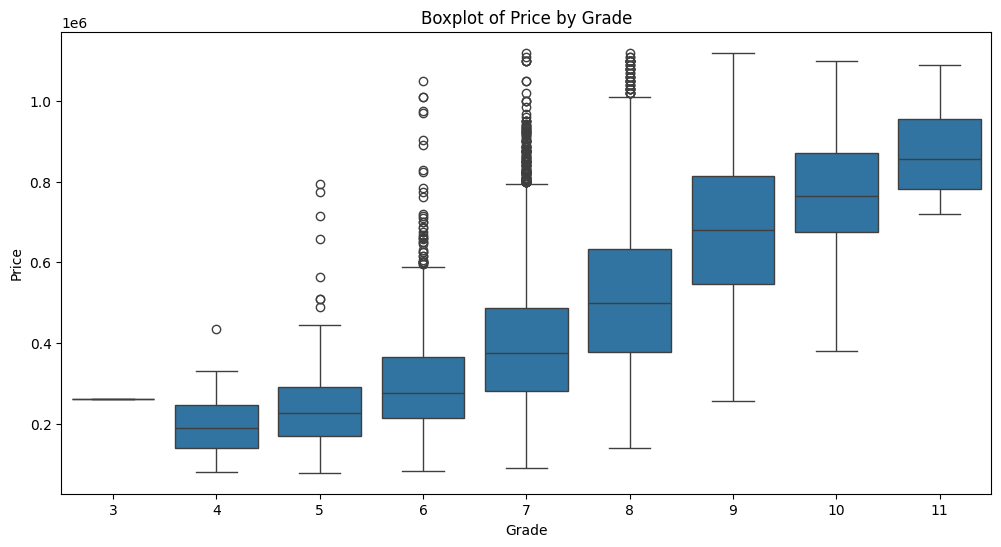

In [ ]:
# Boxplots of Price with Waterfront, View, Condition, and Grade.
plt.figure(figsize=(12, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Boxplot of Price by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='view', y='price', data=df)
plt.title('Boxplot of Price by View')
plt.xlabel('View')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='price', data=df)
plt.title('Boxplot of Price by Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('Boxplot of Price by Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


**Price by Waterfront**: Houses with a **waterfront view** (indicated by '1') clearly have much higher prices compared to those without (indicated by '0'). The **median price** for waterfront properties is significantly higher, and there's a wider range of prices. This highlights that having a waterfront is a premium feature that greatly impacts property value.

**Price by View**: As the **view quality** improves, the **median price** rises as well. The plot shows that homes with better views (ratings of 3 and 4) typically have higher prices, suggesting that a desirable view is an important factor in determining property value.

**Price by Condition**: Homes in **better condition** (ratings of 4 and 5) generally have higher **median prices**. Interestingly, houses with a condition rating of **3** show a wider range of prices, which could be influenced by factors like location or size. Homes in **poor condition** (ratings of 1 and 2) tend to have much lower prices overall.

**Price by Grade**: As the **grade** increases from 3 to 11, the **median price** also rises. Homes with higher grades, which reflect better construction quality and finishes, tend to command much higher prices. Additionally, the price range becomes wider as the grade increases, suggesting that luxury homes in the higher grades can vary significantly in price depending on factors like size and location.

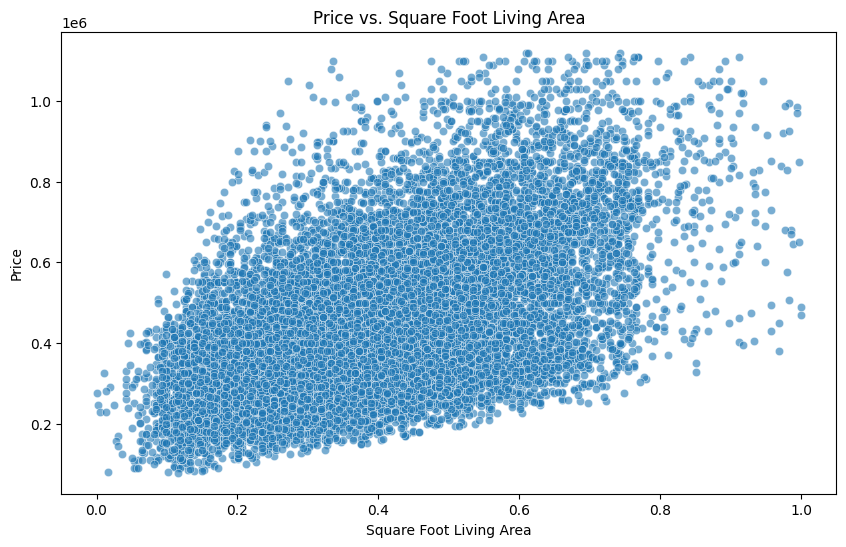

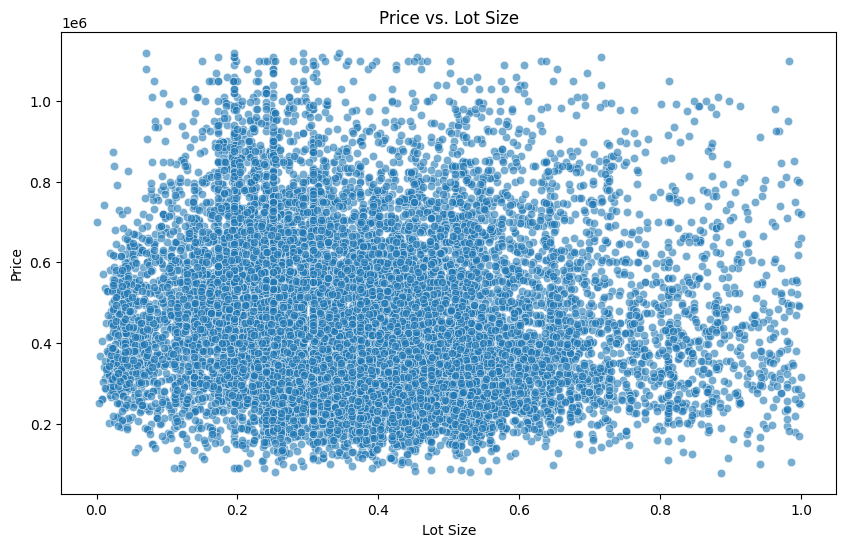

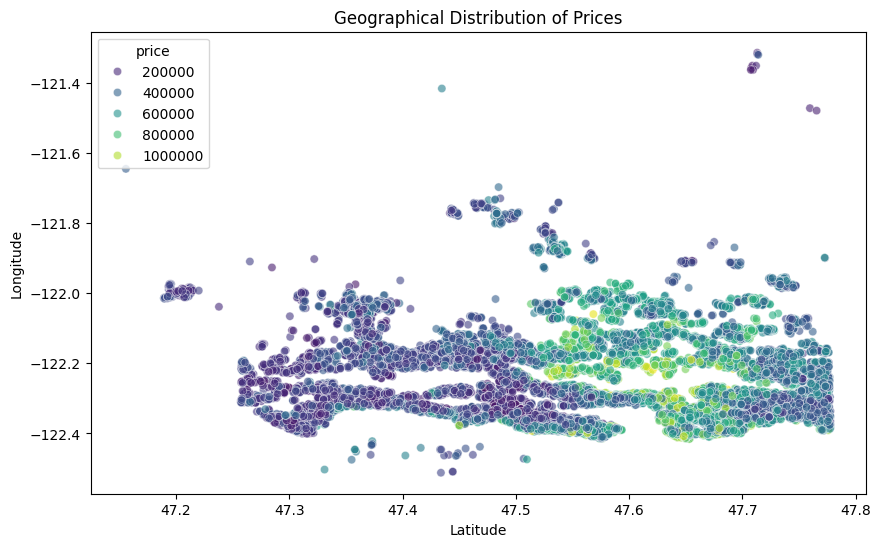

In [ ]:
# Scatterplots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.6)
plt.title('Price vs. Square Foot Living Area')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_lot', y='price', data=df, alpha=0.6)
plt.title('Price vs. Lot Size')
plt.xlabel('Lot Size')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='long', hue='price', data=df, palette='viridis', alpha=0.6)
plt.title('Geographical Distribution of Prices')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()


**Price vs. Square Foot Living Area**: This scatter plot highlights a clear positive relationship between the **size of the living area** and **house prices**: larger homes generally have higher prices. However, the plot also reveals that after a certain size, the price increases more gradually, suggesting that extremely large homes may not always fetch exponentially higher prices.

**Price vs. Lot Size**: The scatter plot doesn't show a strong linear relationship, unlike the living area. While larger lots can sometimes lead to higher prices, there's a lot of variation in pricing for bigger lots. This suggests that other factors, like location or the potential for development, may have a bigger impact on the price than the lot size alone.

**Geographical Distribution of Prices (Latitude vs. Longitude)**: The color gradient in the plot represents different price ranges, with **darker colors** indicating lower prices and **lighter colors** showing higher prices. The plot reveals that higher-priced properties tend to cluster in certain areas, highlighting that **location** is a key factor in determining property value. This aligns with the familiar real estate principle: "location, location, location."

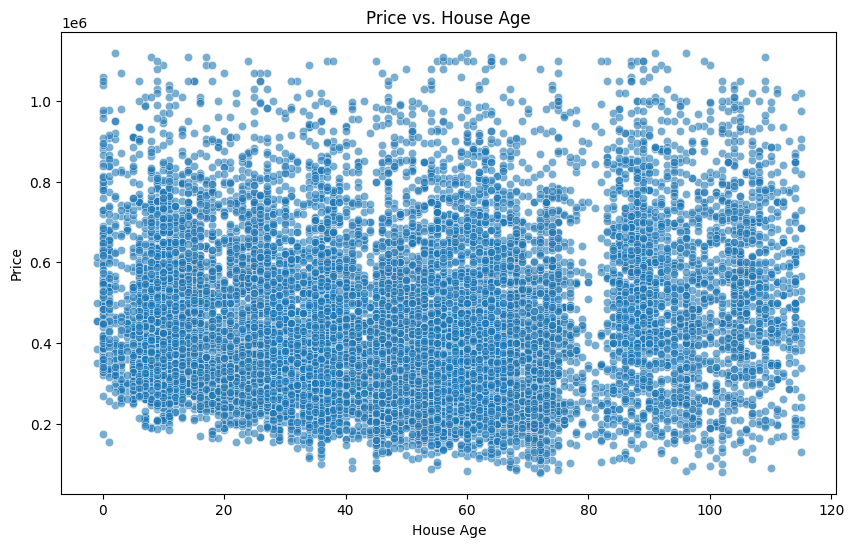

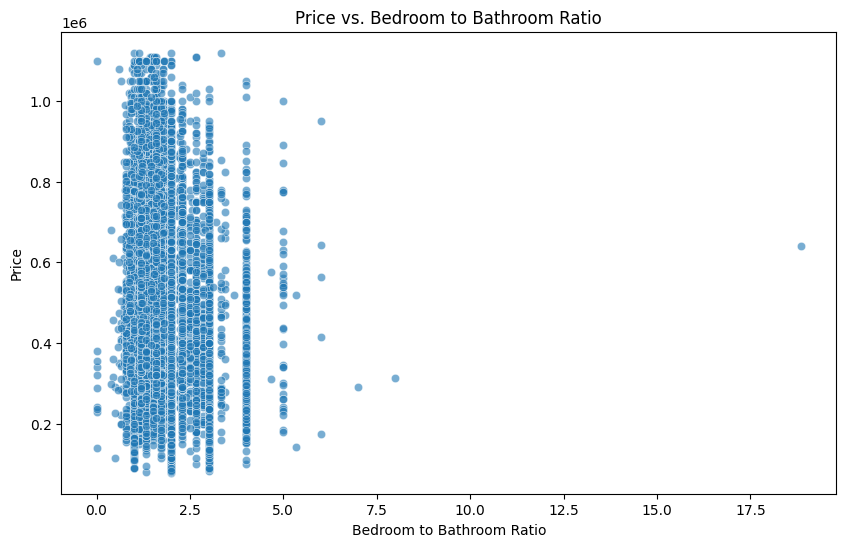

In [ ]:
# Plotting Engineered Features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='house_age', y='price', data=df, alpha=0.6)
plt.title('Price vs. House Age')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='bed_bath_ratio', y='price', data=df, alpha=0.6)
plt.title('Price vs. Bedroom to Bathroom Ratio')
plt.xlabel('Bedroom to Bathroom Ratio')
plt.ylabel('Price')
plt.show()


**Price vs. House Age**: The plot indicates that **house prices** stay fairly stable as homes age, with only a slight decline for older properties. This suggests that while **age** can affect price, factors like **renovations** and **overall condition** likely have a stronger impact. There are no sharp price drops for very old homes, showing that age alone isn't a decisive factor in determining property value.

**Price vs. Bedroom to Bathroom Ratio**: Most houses have a **bedroom-to-bathroom ratio** between **1 and 3**, and higher prices are typically found within this range. Ratios greater than **5** tend to be linked to significantly lower prices, possibly indicating overcrowded or undersized homes in relation to their number of bathrooms. The plot highlights that maintaining a balanced bedroom-to-bathroom ratio is important for preserving property value.

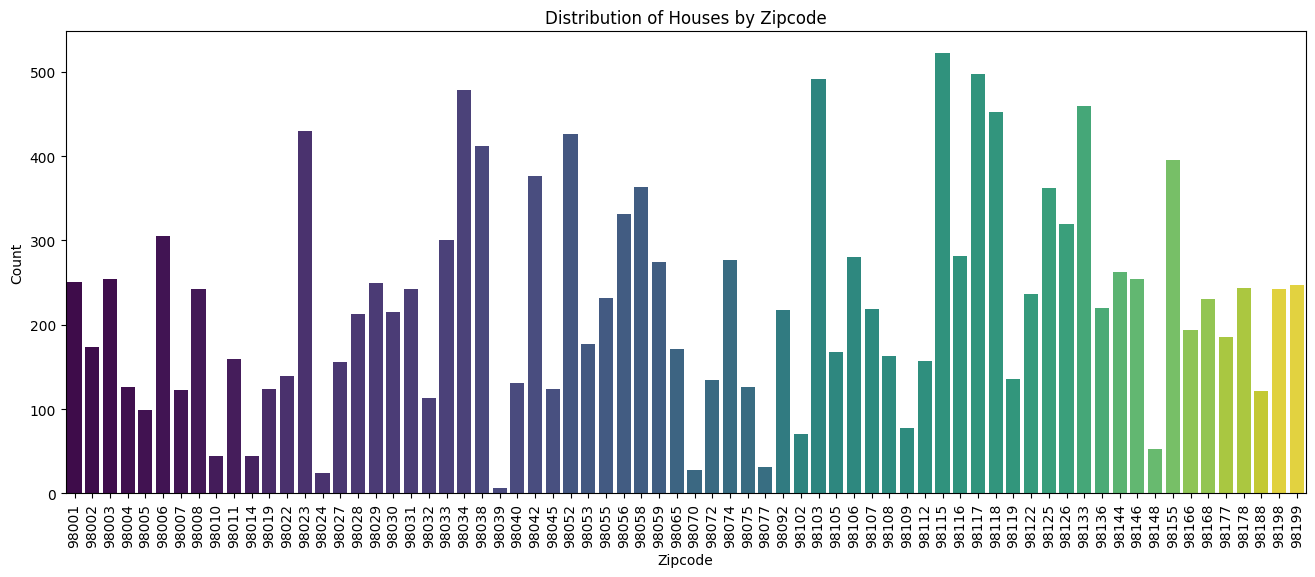

In [ ]:
# Houses by Zipcode
plt.figure(figsize=(16, 6))
sns.countplot(x='zipcode', hue='zipcode', data=df, palette='viridis', legend=False)
plt.title('Distribution of Houses by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

This bar plot illustrates the number of houses available in each **zipcode**. The number of houses varies widely, with some areas like **98023**, **98052**, and **98103** having a higher concentration of homes. Analysing this distribution is important because it highlights areas with more properties, which could influence the accuracy of the model’s predictions. Regions with fewer houses may result in less reliable predictions due to the limited data available for those zipcodes.

<a id = "cell_model"></a>
## 3. Predictive Modeling

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**MLP**

In [ ]:
import tensorflow as tf
from tensorflow.keras import metrics, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Defining the features (X) and target variable (y)
X = df.drop(columns=['price'])  # All features except the target variable 'price'
y = df['price']  # Target variable

In [ ]:
# Split data for training and validation
train_size, valid_size = 0.7, 0.3
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=valid_size, random_state=42)

In [ ]:
print('Size of training set: ', len(X_train))
print('Size of validation set: ', len(X_valid))

Size of training set:  11122
Size of validation set:  4767


In [ ]:
# Impute missing values and scale the data
imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(X_train)
X_train = pd.DataFrame(imputer.transform(X_train), columns=X_train.columns, index=X_train.index)
X_valid = pd.DataFrame(imputer.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns=X_valid.columns, index=X_valid.index)

print('X train min =', round(X_train.min().min(),4), '; max =', round(X_train.max().max(), 4))
print('X valid min =', round(X_valid.min().min(),4), '; max =', round(X_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0571 ; max = 3.3


In [ ]:
# Convert pandas data frames to numpy arrays
arr_x_train = np.array(X_train)
arr_y_train = np.array(y_train).reshape(-1, 1)
arr_x_valid = np.array(X_valid)
arr_y_valid = np.array(y_valid).reshape(-1, 1)

In [ ]:
print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (11122, 23)
Training samples:  11122
Validation samples:  4767


**First Hidden Layer**: This layer has **100 neurons/hidden nodes** and uses the **relu** activation function, which ensures that the output after hidden layer is always 0 or greater.
  
**Second Hidden Layer**: With **180 neurons** and also using **relu**.

**Third Hidden Layer**: This layer has **20 neurons**, continuing with **relu** activation. It helps to gradually reduce the model’s complexity before passing the data to the output layer.

**Output Layer**: The output layer consists of **a single neuron** with a **linear activation function** to predict the continuous target variable, which in our case is the **house price**.

A **dropout rate** of 0.2 was applied, which randomly turns off 20% of the neurons during training. This helps prevent overfitting by ensuring the model doesn’t become too dependent on specific neurons.

**Mean Squared Error (MSE)** was chosen as the **loss function**. It’s ideal for regression tasks like predicting house prices, as it penalises large prediction errors more heavily, encouraging the model to make more accurate predictions.

In [ ]:
# Creating the Keras model
def best_mlp_model(x_size, y_size):
    model = Sequential()
    model.add(Dense(100, activation="relu", input_shape=(x_size,)))
    model.add(Dropout(0.2))
    model.add(Dense(180, activation="relu"))
    model.add(Dense(20, activation="relu"))
    model.add(Dense(y_size))
    model.compile(
        loss='mean_squared_error',
        optimizer=RMSprop(learning_rate=0.005, rho=0.9, momentum=0.0, epsilon=1e-07),
        metrics=[metrics.mae]
    )
    return model

In [ ]:
# Execute the model
model = best_mlp_model(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           2,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 180)                 │          18,180 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 20)                  │           3,620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,221 (94.61 KB)

 Trainable params: 24,221 (94.61 KB)

 Non-trainable params: 0 (0.00 B)

To avoid overfitting and ensuring generalisation to unseen data, **early stopping** was implemented. The model stopped training once the validation loss stopped improving, ensuring it only learned as much as necessary to generalize well without overfitting to the training data.

In [ ]:
# Training the model with early stopping

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(arr_x_train, arr_y_train,
                    batch_size=64,
                    epochs=500,
                    shuffle=True,
                    verbose=2,
                    validation_data=(arr_x_valid, arr_y_valid),
                    callbacks=[early_stopping])

Epoch 1/500
174/174 - 2s - 12ms/step - loss: 116787691520.0000 - mean_absolute_error: 272044.1875 - val_loss: 26351572992.0000 - val_mean_absolute_error: 132404.7969
Epoch 2/500
174/174 - 1s - 7ms/step - loss: 24448352256.0000 - mean_absolute_error: 126007.5547 - val_loss: 21107818496.0000 - val_mean_absolute_error: 117496.0625
Epoch 3/500
174/174 - 1s - 8ms/step - loss: 19645548544.0000 - mean_absolute_error: 110848.6406 - val_loss: 17038631936.0000 - val_mean_absolute_error: 103309.3984
Epoch 4/500
174/174 - 1s - 6ms/step - loss: 16476295168.0000 - mean_absolute_error: 98622.8125 - val_loss: 14743313408.0000 - val_mean_absolute_error: 93054.0312
Epoch 5/500
174/174 - 1s - 6ms/step - loss: 14799781888.0000 - mean_absolute_error: 92070.5312 - val_loss: 13732732928.0000 - val_mean_absolute_error: 89087.1406
Epoch 6/500
174/174 - 1s - 4ms/step - loss: 14082505728.0000 - mean_absolute_error: 89670.5938 - val_loss: 13255806976.0000 - val_mean_absolute_error: 87100.2031
Epoch 7/500
174/174 

**Evaluation**

In [ ]:
# Evaluate the model
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

In [ ]:
print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

Train MAE:  52587.63 , Train Loss:  5430536192.0
Val MAE:  53327.65 , Val Loss:  5652876288.0


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


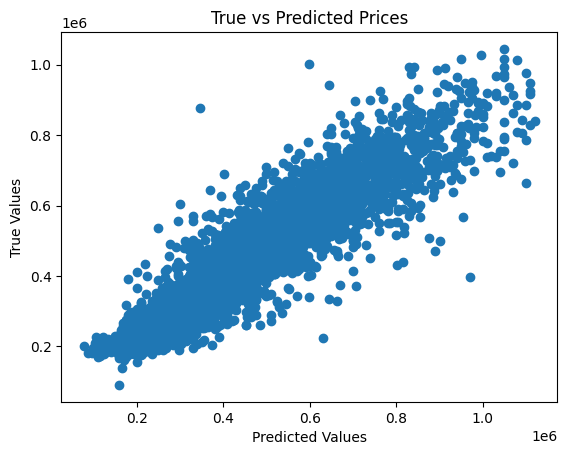

The Correlation between true and predicted values is:  0.924


In [ ]:
# Plotting true vs. predicted values
y_valid_predict = model.predict(arr_x_valid)
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.title("True vs Predicted Prices")
plt.show()

corr_result = np.corrcoef(arr_y_valid.reshape(1, -1)[0], y_valid_predict.reshape(1, -1)[0])
print('The Correlation between true and predicted values is: ', round(corr_result[0,1],3))

The plot shows a strong positive relationship between the **true** and **predicted values**, indicating that the model is generally making accurate predictions. The alignment of points along the diagonal shows that the model successfully captures the underlying patterns in house prices, with only minor deviations in extreme price ranges. However, there is some noticeable variance in the **higher price ranges**, where the model tends to slightly underpredict certain prices. This suggests that while the model performs well overall, it may struggle a bit with accurately predicting **extremely high-priced properties**, likely due to the unique and complex factors that influence these outliers.

In [ ]:
# Calculate RMSE
mlp_rmse = mean_squared_error(arr_y_valid, y_valid_predict, squared=False)

# Calculate R²
mlp_r2 = r2_score(arr_y_valid, y_valid_predict)

print(f"MLP RMSE: {mlp_rmse}")
print(f"MLP R²: {mlp_r2}")

MLP RMSE: 75185.61313473008
MLP R²: 0.846974987761731


In [ ]:
# Plot the training history
def plot_hist(h, xsize=6, ysize=5):
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation ' + train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

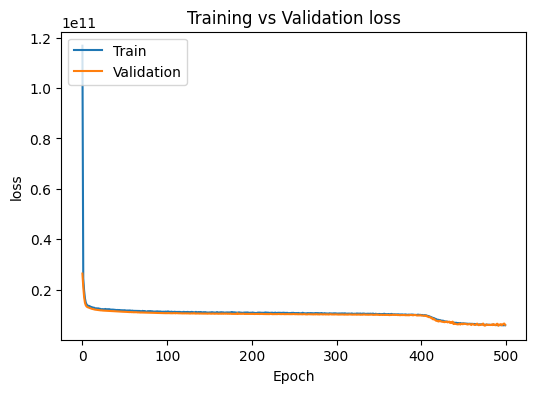

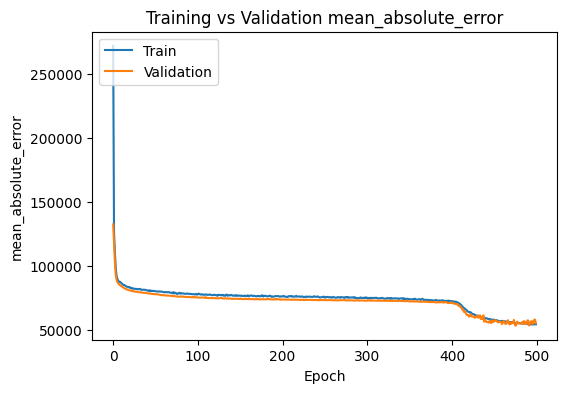

In [ ]:
hist = pd.DataFrame(history.history)
plot_hist(history.history, xsize=6, ysize=4)

**Training vs. Validation Loss**: The **training** and **validation losses** begin quite high but decrease rapidly within the first few epochs, showing that the model quickly starts learning from the data. After around **50 epochs**, the losses converge, with the training and validation curves following nearly identical paths. This indicates minimal overfitting, suggesting that the model is learning effectively and generalizing well to new data.

**Training vs. Validation MAE (Mean Absolute Error)**: The **MAE** drops quickly during the initial epochs, reflecting a rapid learning phase where the model quickly improves. Like the loss graph, the MAE for both the training and validation sets gradually converge as the number of epochs increases, indicating the model is stabilizing and performing consistently across both datasets.

<a id = "cell_report"></a>
## 4. Experiments Report

**Performance Results and the Best Model (MLP 2)**:

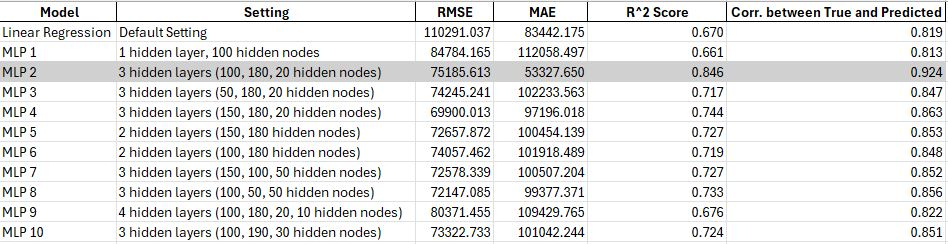

Several models and variations of the **MLP** architecture were compared to determine the best approach for predicting house prices. The experiments aimed to find the optimal model architecture and hyperparameters for the task. Two main models were explored:

**Linear Regression Model**: A simple regression model was used as a baseline to compare the performance of more complex models.
  
**MLP Model**: Different versions of the MLP were tested, experimenting with various numbers of hidden layers (ranging from 2 to 4) and hidden nodes (ranging from 50 to 200). **Early stopping** was also used to prevent overfitting and ensure the model performed well on unseen data.

The **Linear Regression model** underperformed compared to the more complex MLP models. It had the highest **RMSE (110,291.037)** and **MAE (83,442.175)**, along with a low **R² value of 0.67**, indicating that it struggled to capture the more complex patterns in the data. While the correlation between the true and predicted values was **moderately good (0.819)**, it wasn't strong enough to make highly accurate predictions.

**Best Model (MLP 2):**

This model, with three hidden layers (100, 180, and 20 nodes), proved to be the best-performing model. It achieved the lowest **RMSE (75,185.613)** and **MAE (53,327.650)**, along with the highest **R² score (0.846)** and the strongest correlation between the true and predicted values (**0.924**).

The architecture of **MLP 2** struck the right balance between complexity and generalization, allowing it to effectively capture more complex patterns in the data without overfitting. This combination of low error rates and high R² makes it the most suitable model for accurately predicting house prices in real world deployment.

**Other MLP Variations**:

Several other MLP models, including **MLP 3**, **MLP 4**, and **MLP 5**, performed well but didn’t outperform **MLP 2**.

For example, **MLP 3** had a slightly lower **RMSE** than MLP 2 (**74,245.241**), but its significantly higher **MAE (102,233.563)** made it less effective overall.

**MLP 4** showed strong performance with a low **RMSE (69,900.013)**, but its **MAE (97,196.018)** was still higher than MLP 2’s. Despite this, its **R² score (0.744)** and **correlation (0.863)** indicate fairly good performance.

**MLP 8** also demonstrated competitive results with a slightly lower **RMSE (72,147.085)**, but its higher **MAE (93,737.371)** and lower **R² (0.733)** kept it from surpassing the top-performing model.

**Larger Architectures**:

Models with more complex architectures, like **MLP 9** and **MLP 10** (which had 4 layers or a higher number of nodes), performed worse than **MLP 2**. **MLP 9** had the highest **RMSE (80,371.455)** and **MAE (109,429.765)** among the multi-layer models, while **MLP 10** showed some improvement but still fell short with an **RMSE of 73,322.733** and **MAE of 101,042.244**. These results indicate that adding too much complexity can lead to diminishing returns and may actually decrease model performance.

**Addressing the Business Problem**:

The MLP 2 model offers a strong solution for accurately predicting house prices, based on features like square footage, location (zipcode), house age, and more. This model can be a valuable tool for real estate agents, appraisers, and home buyers by helping them make informed decisions about property values. The model provides:

1. Real estate agents with accurate pricing suggestions, ensuring properties are neither overpriced nor undervalued.

2. Home buyers with insights into whether a property is priced fairly in the current market.

3. Market analysts with data-driven recommendations, helping them understand pricing trends and offer advice to clients.

Since the model generalizes well, it can handle diverse datasets, making it useful across various regions and housing markets. In an industry that relies heavily on accurate property valuation, this model supports business decisions and boosts market competitiveness.


**Suitability for Deployment in Real World**:

1. Scalability: The model must be able to handle large and growing datasets, offering both batch and real time predictions to meet the needs of real estate companies.

2. Data Maintenance: Regular updates to the training data are critical to reflect changes in the market. Automated pipelines for data updates and model retraining should be in place to maintain accuracy.

3. Interpretability: Since the model is complex, providing clear explanations for price predictions can build user trust and ensure compliance with regulations.

4. API Integration: Deploying the model via an accessible platform (such as API services) will enable seamless integration into websites and applications for real estate agents and buyers.

5. Monitoring for Data Drift: Continuous monitoring should be implemented to detect any shifts in the data that could affect the model’s performance. Retraining should occur as needed to maintain accuracy.


<a id = "cell_report"></a>
## 5. References

1. Chollet, F., & others. (2015). Keras. https://keras.io

2. Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

3. McKinney, W. (2010). Data structures for statistical computing in python. Proceedings of the 9th Python in Science Conference, 51-56. https://doi.org/10.25080/Majora-92bf1922-00a

4. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M., & Duchesnay, É. (2011). Scikit-learn: Machine learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://jmlr.org/papers/v12/pedregosa11a.html

5. Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with python. Proceedings of the 9th Python in Science Conference, 92-96. https://doi.org/10.25080/Majora-92bf1922-011

6. Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021

7. TensorFlow Developers. (2023). TensorFlow. https://www.tensorflow.org